# Assignment 4 - Tamim Shaban

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from distfit import distfit

### Loading Data

In [2]:
housing_data = load_boston()
boston = pd.DataFrame(housing_data.data)
boston.columns = housing_data.feature_names
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [3]:
prices = pd.DataFrame(housing_data.target, dtype=float)
prices.size

506

In [4]:
print(housing_data.DESCR[:1230])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Q1: Data Exploration

### Heatmap of feature correlation including price

<AxesSubplot:>

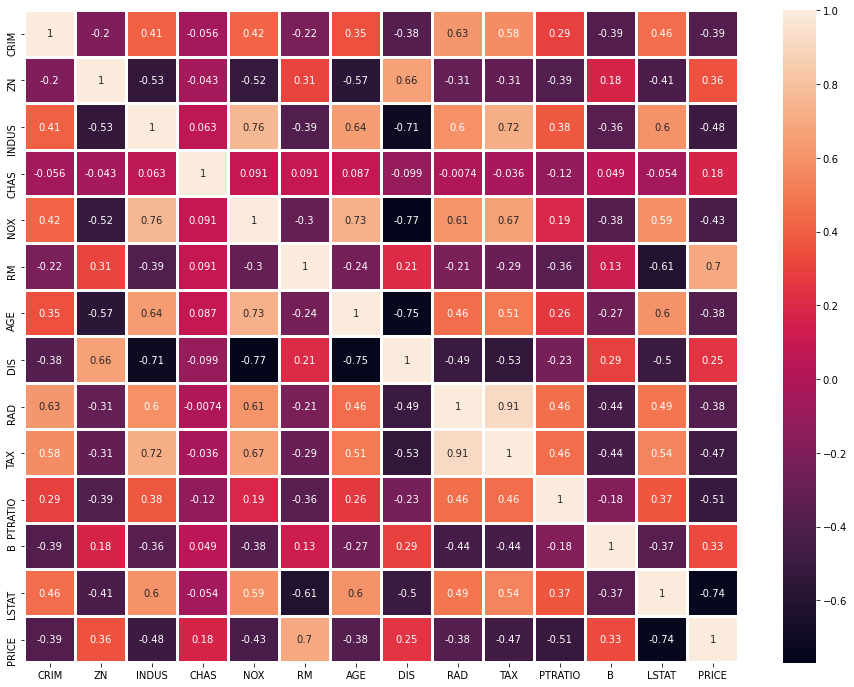

In [5]:
boston_combined = boston.copy()
boston_combined.insert(len(housing_data.feature_names), "PRICE", prices, False)
plt.figure(figsize=(16,12))
sns.heatmap(boston_combined.corr(),annot=True,linewidths=2)

Heatmap of all features including the price. The most significant row is the bottom-most one as it represent the correlation between the all features in the data set and price. From this row, we can determine that the price has a strong postiive correlation with the number of room. The most significatn negative correlation on the row is between price and LSTAT. LSTAT represent the portion of adults who have not completed high school or who work as laborers.

### Features vs Price

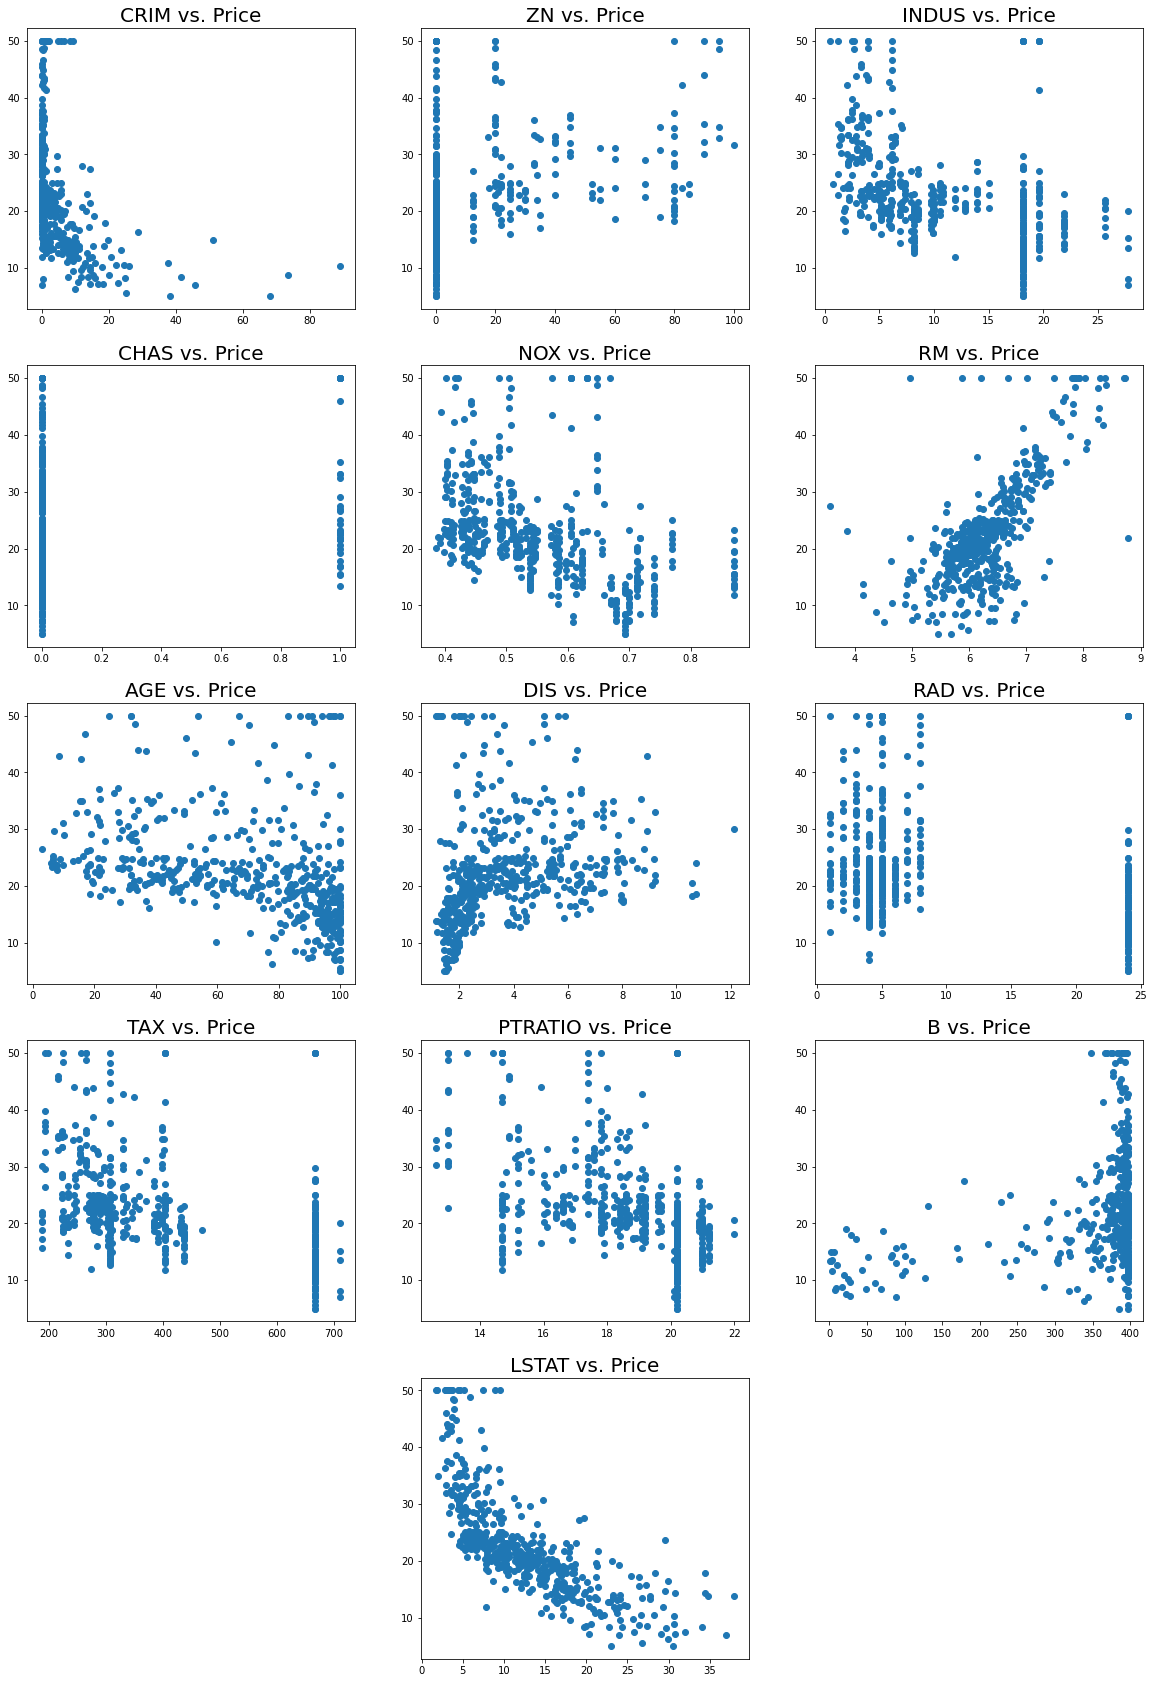

In [6]:
fig = plt.figure(figsize=(20, 30))
gs = gridspec.GridSpec(5,3)
for index, col in enumerate(list(boston.columns)):
    index = index+1 if index == len(list(boston.columns))-1 else index
    ax = plt.subplot(gs[index])
    ax.scatter(boston[col], prices)
    ax.set_title(col+" vs. Price", fontdict={'fontsize':20})

These are scatter plots of all features vs price.
#### RM vs. Price
Looking directly at the data, we can see that postive correlation of the previous plot. As the number of rooms increase, so does the portion of higher prices increase.
#### LSTAT vs. Price
LSTAT represents the opposite tren. As portion of under-education adults increases, the prices of houses in those areas decreases.

### Distribution of Each Feature

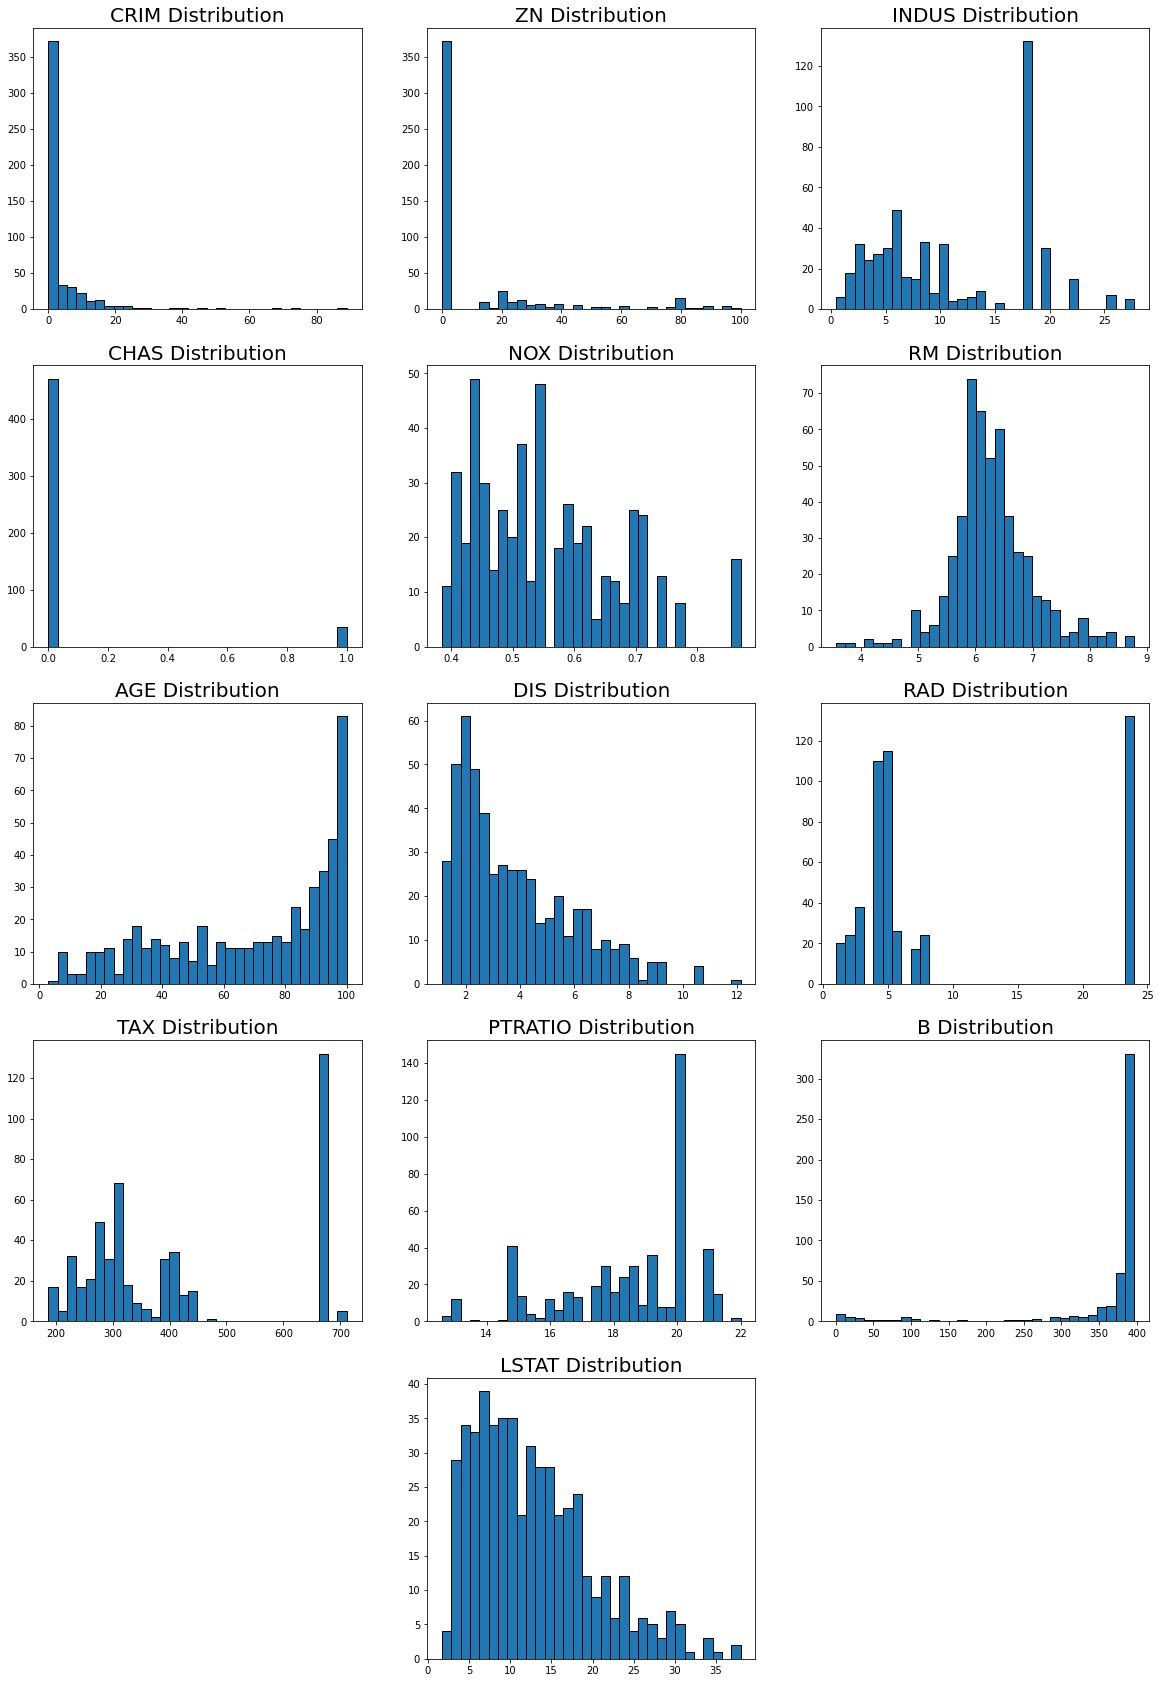

In [7]:
fig = plt.figure(figsize=(20, 30))
gs = gridspec.GridSpec(5,3)
for index, col in enumerate(list(boston.columns)):
    index = index+1 if index == len(list(boston.columns))-1 else index
    ax = plt.subplot(gs[index])
    ax.hist(boston[col], bins=32, edgecolor='black')
    ax.set_title(col+" Distribution", fontdict={'fontsize':20})

Each histogram above is represents the distribution of one of the features of the housing data.
#### RM Histogram
The room data looks like it has a normal distribution.
#### LSTAT Histogram
As for the LSTAT distribution, it looks like it would be best fit with a Weibull distribution.

## Q2: Price Exploration

Text(0.5, 1.0, 'Distribution of Price')

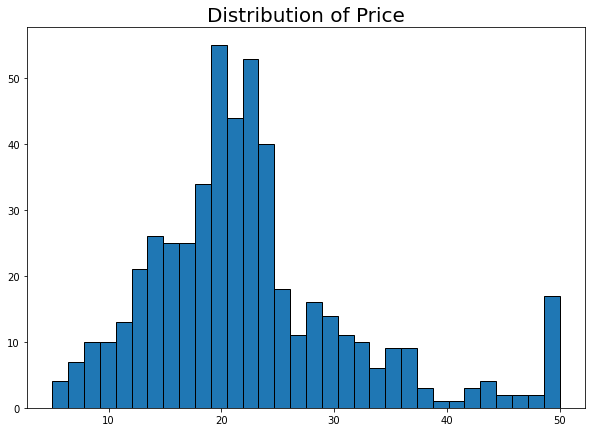

In [8]:
plt.figure(figsize=(10,7))
plt.hist(prices, bins=32, edgecolor='black')
plt.title("Distribution of Price", fontdict={'fontsize':20})

In [9]:
dist = distfit()
dist.fit_transform(prices[0])

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [RSS: 0.0101463] [loc=22.533 scale=9.188] 
[distfit] >[expon     ] [RSS: 0.0276670] [loc=5.000 scale=17.533] 
[distfit] >[pareto    ] [RSS: 0.0574726] [loc=-0.005 scale=5.005] 
[distfit] >[dweibull  ] [RSS: 0.0047871] [loc=21.200 scale=6.502] 
[distfit] >[t         ] [RSS: 0.0060217] [loc=20.540 scale=6.813] 
[distfit] >[genextreme] [RSS: 0.0075443] [loc=18.480 scale=7.237] 
[distfit] >[gamma     ] [RSS: 0.0080311] [loc=0.985 scale=3.738] 
[distfit] >[lognorm   ] [RSS: 0.0076956] [loc=-5.807 scale=26.987] 
[distfit] >[beta      ] [RSS: 0.0080615] [loc=1.136 scale=9820124.404] 
[distfit] >[uniform   ] [RSS: 0.0237104] [loc=5.000 scale=45.000] 
[distfit] >Compute confidence interval [parametric]


{'model': {'distr': <scipy.stats._continuous_distns.dweibull_gen at 0x7f69e1a1b580>,
  'params': (0.9939774834972399, 21.199999999999996, 6.502195771419718),
  'name': 'dweibull',
  'RSS': 0.004787050272947094,
  'loc': 21.199999999999996,
  'scale': 6.502195771419718,
  'arg': (0.9939774834972399,),
  'CII_min_alpha': 6.1522905365452925,
  'CII_max_alpha': 36.2477094634547},
 'summary':         distr         RSS  LLE         loc        scale  \
 0    dweibull  0.00478705  NaN        21.2       6.5022   
 1           t  0.00602173  NaN     20.5398      6.81331   
 2  genextreme   0.0075443  NaN       18.48      7.23651   
 3     lognorm  0.00769558  NaN    -5.80677      26.9866   
 4       gamma  0.00803113  NaN    0.985139      3.73773   
 5        beta  0.00806154  NaN     1.13649  9.82012e+06   
 6        norm   0.0101463  NaN     22.5328      9.18801   
 7     uniform   0.0237104  NaN           5           45   
 8       expon    0.027667  NaN           5      17.5328   
 9      pa

[distfit] >plot summary..


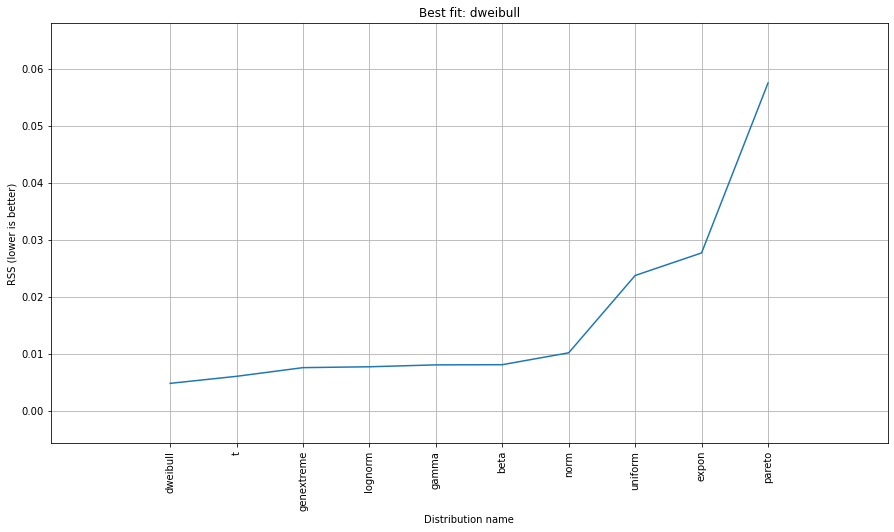

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Best fit: dweibull'}, xlabel='Distribution name', ylabel='RSS (lower is better)'>)

In [10]:
dist.plot_summary()

### Price Distribution
The distribution of Price best fits a weibull distribution, however, a t-distribution fits Price as well albeit with a slightly higher RSS value

## Q3: Test-Train Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(boston, prices, test_size=0.3, random_state=42)
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (354, 13)
Test feature set size: (152, 13)
Training variable set size: (354, 1)
Test variable set size: (152, 1)


## Q4: Linear Regression

In [12]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

### Intercept

In [13]:
print("The intercept term of the linear model:", lm.intercept_)

The intercept term of the linear model: [31.63108404]


### Feature Coefficients

In [14]:
cdf = pd.DataFrame(data=lm.coef_.T, index=X_train.columns, columns=["Coefficients"])
cdf

,Coefficients
CRIM,-0.133470
ZN,0.035809
INDUS,0.049523
CHAS,3.119835
NOX,-15.417061
RM,4.057199
AGE,-0.010821
DIS,-1.385998
RAD,0.242727
TAX,-0.008702


## Q5: Model Performance

In [15]:
predictions = lm.predict(X_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean absolute error (MAE): 3.16270987145742
Mean square error (MSE): 21.51744423117737
Root mean square error (RMSE): 4.638689926172838
